# Preparations   

In [1]:
import pandas as pd
import numpy as np
# import matplotlib as mp
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt
import os

In [2]:
f2015 = pd.read_csv("f2015.csv") # index_col
f2016 = pd.read_csv("f2016.csv")
f2017 = pd.read_csv("f2017.csv")
f2018 = pd.read_csv("f2018.csv")
f2019 = pd.read_csv("f2019.csv")

In [ ]:
f2019.sample(n=15)

In [3]:
### FLOW Within Guangdong province and HONGKONG AND MACAO

csvlist = [f2015,f2016,f2017,f2018,f2019]
dictx = {'广州(.*)':'Guangzhou','深圳(.*)':'Shenzhen','珠海(.*)':'Zhuhai','汕头(.*)':'Shantou',
        '佛山(.*)':'Foshan','韶关(.*)':'Shaoguan','河源(.*)':'Heyuan','梅州(.*)':'Meizhou',
        '惠州(.*)':'Huizhou','汕尾(.*)':'Shanwei','东莞(.*)':'Dongguan','中山(.*)':'Zhongshan',
        '江门(.*)':'Jiangmen','阳江(.*)':'Yangjiang','湛江(.*)':'Zhanjiang','茂名(.*)':'Maoming',
        '肇庆(.*)':'Zhaoqing','清远(.*)':'Qingyuan','潮州(.*)':'Chaozhou','揭阳(.*)':'Jieyang',
        '云浮(.*)':'Yunfu','澳门(.*)':'Macao','香港(.*)':'Hongkong'}
for n in range(5):
    x = csvlist[n]
    print(str(2015+n)+'s original value:',len(x))

    #1DROP NULL
    x = x[x.人数 != 0]
    
    #2EXTRACT FLOW WITH IN THE CHOSEN CITIES
    x = x[x.城市1.str.contains("广州|深圳|珠海|汕头|佛山|韶关|河源|梅州|惠州|汕尾|东莞|中山|江门|阳江|湛江|茂名|肇庆|清远|潮州|揭阳|云浮|澳门|香港")
      & x.城市2.str.contains("广州|深圳|珠海|汕头|佛山|韶关|河源|梅州|惠州|汕尾|东莞|中山|江门|阳江|湛江|茂名|肇庆|清远|潮州|揭阳|云浮|澳门|香港")]
    print('1 counts after extracting cities in GD province,and HK and MC:',len(x)) #1取大湾区并删除空值后数量

    #3CHANGING THE NAMES INTO ENGLISH
    x.replace({'城市1':dictx,'城市2':dictx} ,inplace = True ,regex = True)
    
    #4CHANGE THE DATA TYPE OF DATE  
    x['月份']=(x['月份'] +(2015+n)*100)
    x['月份'] = pd.to_datetime(x['月份'] , format = "%Y%m") 
    
    #5DROP DUPLICATED DATA(keep =  first， maybe groupby().agg(sum)) !!!! ，最好是不变 
    x.drop_duplicates(subset=['月份', '城市1', '城市2','迁入迁出', '类型'],keep ='first', inplace = True) 
    print('2 counts after dropping duplicates:',len(x))# 不变就对了 #2尝试去重后数量

    #6UNIFYING THE DIRECTION OF FLOW
    x.loc[x['迁入迁出'] =='in',['城市1', '城市2']] = x.loc[x['迁入迁出'] == 'in',['城市2', '城市1']].values
    #df.a, df.b = np.where(df.a > df.b, [df.b, df.a], [df.a, df.b])  !!!!
    x.drop(columns = ['迁入迁出'] ,inplace = True)
    
    #7DROP DUPLICATED DATA(keep =  first， maybe groupby().agg(sum)) !!!!  
    x.drop_duplicates(subset=['月份', '城市1', '城市2', '类型'],keep ='first', inplace = True) 
    print('3 counts after redropping duplicates after unifying directions :',len(x),'\n\n') #3再按照数值外值去重后数量
    csvlist[n] = x

f15,f16,f17,f18,f19 = csvlist
del f2015,f2016,f2017,f2018,f2019,csvlist,dictx
# display(f15.info(),f15.sample(n=20))

2015original value: 516246
1 counts after extracting cities in GD province,and HK and MC: 10600
2 counts after dropping duplicates: 10417
3 counts after dropping duplicates : 6640 


2016original value: 534121
1 counts after extracting cities in GD province,and HK and MC: 10843
2 counts after dropping duplicates: 10843
3 counts after dropping duplicates : 7018 


2017original value: 540526
1 counts after extracting cities in GD province,and HK and MC: 10969
2 counts after dropping duplicates: 10969
3 counts after dropping duplicates : 7205 


2018original value: 555143
1 counts after extracting cities in GD province,and HK and MC: 10908
2 counts after dropping duplicates: 10908
3 counts after dropping duplicates : 7178 


2019original value: 275583
1 counts after extracting cities in GD province,and HK and MC: 7163
2 counts after dropping duplicates: 7163
3 counts after dropping duplicates : 4732 




In [4]:
f2015 = pd.read_csv("f2015.csv") # index_col
f2016 = pd.read_csv("f2016.csv")
f2017 = pd.read_csv("f2017.csv")
f2018 = pd.read_csv("f2018.csv")
f2019 = pd.read_csv("f2019.csv")

In [5]:

### FLOW Related to Guangdong province and HONGKONG AND MACAO

csvlist = [f2015,f2016,f2017,f2018,f2019]
dictx = {'广州(.*)':'Guangzhou','深圳(.*)':'Shenzhen','珠海(.*)':'Zhuhai','汕头(.*)':'Shantou',
        '佛山(.*)':'Foshan','韶关(.*)':'Shaoguan','河源(.*)':'Heyuan','梅州(.*)':'Meizhou',
        '惠州(.*)':'Huizhou','汕尾(.*)':'Shanwei','东莞(.*)':'Dongguan','中山(.*)':'Zhongshan',
        '江门(.*)':'Jiangmen','阳江(.*)':'Yangjiang','湛江(.*)':'Zhanjiang','茂名(.*)':'Maoming',
        '肇庆(.*)':'Zhaoqing','清远(.*)':'Qingyuan','潮州(.*)':'Chaozhou','揭阳(.*)':'Jieyang',
        '云浮(.*)':'Yunfu','澳门(.*)':'Macao','香港(.*)':'Hongkong'}
for n in range(5):
    x = csvlist[n]
    print(str(2015+n)+'s original value:',len(x))

    #1DROP NULL
    x = x[x.人数 != 0]
    
    #2EXTRACT FLOW WITH IN THE CHOSEN CITIES
    x = x[x.城市1.str.contains("广州|深圳|珠海|汕头|佛山|韶关|河源|梅州|惠州|汕尾|东莞|中山|江门|阳江|湛江|茂名|肇庆|清远|潮州|揭阳|云浮|澳门|香港")
        | x.城市2.str.contains("广州|深圳|珠海|汕头|佛山|韶关|河源|梅州|惠州|汕尾|东莞|中山|江门|阳江|湛江|茂名|肇庆|清远|潮州|揭阳|云浮|澳门|香港")]
    print('1 counts after extracting cities in GD province,and HK and MC:',len(x))

    #3CHANGING THE NAMES INTO ENGLISH
    x.replace({'城市1':dictx,'城市2':dictx} ,inplace = True ,regex = True)
    
    #4CHANGE THE DATA TYPE OF DATE    
    x['月份']=(x['月份'] +(2015+n)*100)
    x['月份'] = pd.to_datetime(x['月份'] , format = "%Y%m") 
    
    #5DROP DUPLICATED DATA(keep =  first， maybe groupby().agg(sum)) !!!! ，最好是不变 
    x.drop_duplicates(subset=['月份', '城市1', '城市2','迁入迁出', '类型'],keep ='first', inplace = True) 
    print('2 counts after dropping duplicates:',len(x))# 不变就对了

    #6UNIFYING THE DIRECTION OF FLOW
    x.loc[x['迁入迁出'] =='in',['城市1', '城市2']] = x.loc[x['迁入迁出'] == 'in',['城市2', '城市1']].values
    #df.a, df.b = np.where(df.a > df.b, [df.b, df.a], [df.a, df.b])  !!!!
    x.drop(columns = ['迁入迁出'] ,inplace = True)
    
    #7DROP DUPLICATED DATA(keep =  first， maybe groupby().agg(sum)) !!!!  
    x.drop_duplicates(subset=['月份', '城市1', '城市2', '类型'],keep ='first', inplace = True) 
    print('3 counts after redropping duplicates after unifying directions:',len(x),'\n\n')
    csvlist[n] = x

g15,g16,g17,g18,g19 = csvlist
del f2015,f2016,f2017,f2018,f2019,csvlist,dictx
# display(g15.info(),g15.sample(n=20))

2015年原始数量: 516246
1 counts after extracting cities in GD province,and HK and MC: 77450
2 counts after dropping duplicates: 76540
3 counts after dropping duplicates : 72718 


2016年原始数量: 534121
1 counts after extracting cities in GD province,and HK and MC: 78499
2 counts after dropping duplicates: 78499
3 counts after dropping duplicates : 74672 


2017年原始数量: 540526
1 counts after extracting cities in GD province,and HK and MC: 74523
2 counts after dropping duplicates: 74523
3 counts after dropping duplicates : 70755 


2018年原始数量: 555143
1 counts after extracting cities in GD province,and HK and MC: 74278
2 counts after dropping duplicates: 74278
3 counts after dropping duplicates : 67175 


2019年原始数量: 275583
1 counts after extracting cities in GD province,and HK and MC: 43594
2 counts after dropping duplicates: 43594
3 counts after dropping duplicates : 38907 




In [6]:
# Concatenate all the years 
ff = pd.concat([f15,f16,f17,f18,f19], ignore_index=True)  #all years other places excluded
gg = pd.concat([g15,g16,g17,g18,g19], ignore_index=True)  #all years other places included
display(len(ff),len(gg))
display(ff.sample(n=20),gg.sample(n=20))

32773

324227

,月份,城市1,城市2,类型,人数
8257,2016-03-01,Zhanjiang,Shenzhen,train,107243
12434,2016-10-01,Shenzhen,Zhaoqing,train,88650
6254,2015-12-01,Guangzhou,Huizhou,bus,863865
14262,2017-01-01,Zhaoqing,Zhanjiang,air,12
30926,2019-05-01,Shantou,Heyuan,bus,4168
32517,2019-08-01,Shanwei,Guangzhou,bus,86225
5014,2015-09-01,Shenzhen,Zhaoqing,train,81396
6532,2015-12-01,Zhanjiang,Maoming,train,135035
9659,2016-06-01,Jiangmen,Yunfu,train,1331
2719,2015-05-01,Jiangmen,Dongguan,train,40095


,月份,城市1,城市2,类型,人数
13509,2015-03-01,内江市,Xg,air,2
68100,2015-12-01,Sz,宜宾市,air,3718
156364,2017-02-01,Sz,楚雄彝族自治州,train,5714
60791,2015-10-01,黄南藏族自治州,Qy,air,2
85486,2016-03-01,北京市,Sz,air,126145
86623,2016-03-01,Gz,恩施土家族苗族自治州,train,584
143496,2016-12-01,贵阳,Jy,air,376
217784,2017-12-01,Sz,鞍山市,air,562
14456,2015-03-01,广安市,Gz,air,3447
297876,2019-03-01,达州,Hy,air,10


In [7]:
%who

f15	 f16	 f17	 f18	 f19	 ff	 g15	 g16	 g17	 
g18	 g19	 gg	 n	 np	 os	 pd	 plt	 x	 



# plotting overall trend    

In [8]:
ff_bus = ff[ff.类型 == 'bus']
ff_train = ff[ff.类型 == 'train']
ff_air = ff[ff.类型 == 'air']

ffsum_alltype = pd.DataFrame(
    ff['人数'].groupby(ff['月份']).sum()
                            )

#ffsum_bytype = ff[['人数','类型']].groupby(ff['月份'])  # groupby
ff_bustrend = pd.DataFrame(ff_bus['人数'].groupby(ff_bus['月份']).sum())
ff_traintrend = pd.DataFrame(ff_train['人数'].groupby(ff_train['月份']).sum())
ff_airtrend = pd.DataFrame(ff_air['人数'].groupby(ff_air['月份']).sum())

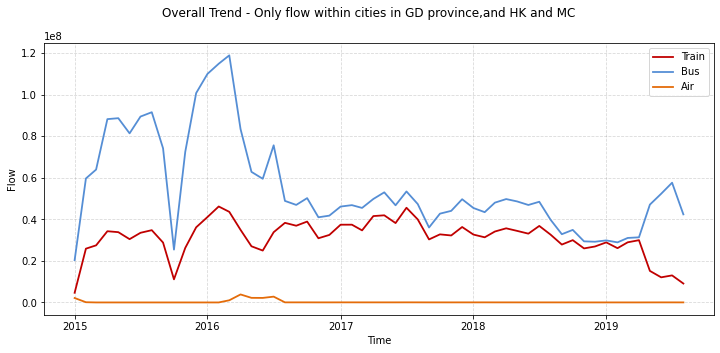

In [9]:
fig = plt.figure(figsize=(12,5))
x1 = ff_traintrend.index
x2 = ff_airtrend.index
y1,y2,y3 =  ff_traintrend.人数 , ff_bustrend.人数 ,  ff_airtrend.人数
# display(len(x),len(y1),len(y2),len(y3))

plt.plot(x1,y1, color="#c00000",label='Train',linewidth= 1.8)
plt.plot(x1,y2, color="#558ed5",label='Bus',linewidth= 1.8)
plt.plot(x2,y3, color="#e46c0a",label='Air',linewidth= 1.8)
plt.grid(color='grey', linestyle='--',alpha=0.3)
plt.legend(loc=1)
plt.xlabel('Time')
plt.ylabel('Flow')
plt.suptitle('Overall Trend - Only flow within cities in GD province, HK and MC',) #fontsize=14
plt.show()

In [10]:
gg_bus = gg[gg.类型 == 'bus']
gg_train = gg[gg.类型 == 'train']
gg_air = gg[gg.类型 == 'air']

ggsum_alltype = pd.DataFrame(
    gg['人数'].groupby(gg['月份']).sum()
                            )

#ffsum_bytype = ff[['人数','类型']].groupby(ff['月份'])  # groupby
gg_bustrend = pd.DataFrame(gg_bus['人数'].groupby(gg_bus['月份']).sum())
gg_traintrend = pd.DataFrame(gg_train['人数'].groupby(gg_train['月份']).sum())
gg_airtrend = pd.DataFrame(gg_air['人数'].groupby(gg_air['月份']).sum())

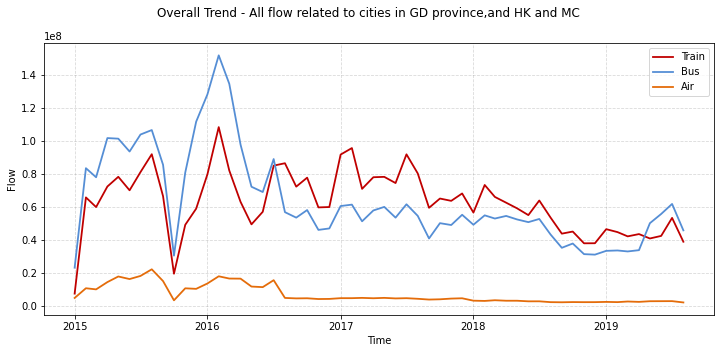

In [11]:
fig = plt.figure(figsize=(12,5))
x1 = gg_traintrend.index
x2 = gg_airtrend.index
y1,y2,y3 =  gg_traintrend.人数 , gg_bustrend.人数 ,  gg_airtrend.人数
# display(len(x),len(y1),len(y2),len(y3))

plt.plot(x1,y1, color="#c00000",label='Train',linewidth= 1.8)
plt.plot(x1,y2, color="#558ed5",label='Bus',linewidth= 1.8)
plt.plot(x2,y3, color="#e46c0a",label='Air',linewidth= 1.8)
plt.grid(color='grey', linestyle='--',alpha=0.3)
plt.legend(loc=1)
plt.xlabel('Time')
plt.ylabel('Flow')
plt.suptitle('Overall Trend - All flow related to cities in GD province, HK and MC',) #fontsize=14
plt.show()

In [12]:
ff_bus['月份'].sample(n = 5)

25042   2018-07-01
10805   2016-08-01
9089    2016-05-01
21814   2018-02-01
24781   2018-07-01
Name: 月份, dtype: datetime64[ns]

In [17]:
# ff_bus = ff[ff.类型 == 'bus']
# ff_train = ff[ff.类型 == 'train']
# ff_air = ff[ff.类型 == 'air']

# ff_bus201502 = ff_bus[ff_bus['月份'] == '2015-02-01']
# ff_train201502 = ff_train[ff_train['月份'] == '2015-02-01']

# ff_bus201602 = ff_bus[ff_bus['月份'] == '2016-02-01']
# ff_train201602 = ff_train[ff_train['月份'] == '2016-02-01']

# ff_bus201702 = ff_bus[ff_bus['月份'] == '2017-02-01']
# ff_train201702 = ff_train[ff_train['月份'] == '2017-02-01']

# ff_bus201802 = ff_bus[ff_bus['月份'] == '2018-02-01']
# ff_train201802 = ff_train[ff_train['月份'] == '2018-02-01']

ff_bus2017 = ff_bus[ff_bus['月份'] >= '2017-01-01'] # & ff_bus['月份'] <= '2019-07-01'
ff_train2017 = ff_train[ff_train['月份'] >= '2017-01-01'] # & ff_train['月份'] <= '2019-07-01'

#print(ff_train201502.count(),'\n',ff_train201602.count(),'\n',ff_train201702.count(),'\n',ff_train201802.count(),'\n',ff_train201902.count(),'\n')

In [18]:
# gg_bus201502 = gg_bus[gg_bus['月份'] == '2015-02-01']
# gg_train201502 = gg_train[gg_train['月份'] == '2015-02-01']

# gg_bus201602 = gg_bus[gg_bus['月份'] == '2016-02-01']
# gg_train201602 = gg_train[gg_train['月份'] == '2016-02-01']

# gg_bus201702 = gg_bus[gg_bus['月份'] == '2017-02-01']
# gg_train201702 = gg_train[gg_train['月份'] == '2017-02-01']

# gg_bus201802 = gg_bus[gg_bus['月份'] == '2018-02-01']
# gg_train201802 = gg_train[gg_train['月份'] == '2018-02-01']

# gg_bus201902 = gg_bus[gg_bus['月份'] == '2019-02-01']
# gg_train201902 = gg_train[gg_train['月份'] == '2019-02-01']

# print(gg_train201502.count(),'\n',gg_train201602.count(),'\n',gg_train201702.count(),'\n',gg_train201802.count(),'\n',gg_train201902.count(),'\n')

# Drawing and extracting pivot_tables    

In [19]:
ff_bus2017_pivot = pd.pivot_table(ff_bus2017, values ="人数", index="城市1", columns = "城市2",aggfunc=np.sum, margins=True)
ff_bus2017_pivot.to_excel('ff_bus2017_pivot.xlsx')
ff_bus2017_pivot

城市2,Chaozhou,Dongguan,Foshan,Guangzhou,Heyuan,Hongkong,Huizhou,Jiangmen,Jieyang,Macao,...,Shanwei,Shaoguan,Shenzhen,Yangjiang,Yunfu,Zhanjiang,Zhaoqing,Zhongshan,Zhuhai,All
城市1,,,,,,,,,,,,,,,,,,,,,
Chaozhou,NaN,182880.0,14423.0,721351.0,11068.0,NaN,290044.0,NaN,3370578.0,NaN,...,157727.0,NaN,435006.0,NaN,NaN,328.0,550.0,91.0,217.0,17172602
Dongguan,193621.0,NaN,7854797.0,39628966.0,1774280.0,434872.0,30233811.0,2483851.0,842135.0,NaN,...,687681.0,791845.0,100571850.0,1043775.0,1067635.0,758141.0,704275.0,4740875.0,1552934.0,202152220
Foshan,19344.0,7623222.0,NaN,68469680.0,553227.0,NaN,2169653.0,12113473.0,283117.0,NaN,...,302132.0,896630.0,5934660.0,1557998.0,3483469.0,950129.0,12986259.0,21200043.0,1190881.0,147503806
Guangzhou,704787.0,39253045.0,69218663.0,NaN,2278284.0,NaN,14431254.0,8401718.0,1768551.0,NaN,...,1953419.0,3339423.0,22879924.0,2332528.0,2810356.0,1732879.0,6871604.0,11598118.0,4587120.0,217326285
Heyuan,10631.0,1708310.0,562666.0,2621485.0,NaN,201.0,5120953.0,110.0,195010.0,NaN,...,75845.0,768719.0,4006458.0,NaN,NaN,NaN,565.0,117326.0,1819.0,17373428
Hongkong,NaN,307712.0,1911.0,8452.0,NaN,NaN,105655.0,28191.0,NaN,NaN,...,111854.0,NaN,14027744.0,NaN,NaN,NaN,NaN,27139.0,734663.0,15353541
Huizhou,299995.0,29340049.0,2130789.0,14312403.0,5149215.0,121605.0,NaN,11951.0,1635979.0,NaN,...,3375272.0,451530.0,41742703.0,1975.0,13876.0,NaN,23522.0,785525.0,141919.0,102264844
Jiangmen,NaN,2207537.0,11959623.0,8435601.0,NaN,21928.0,3654.0,NaN,NaN,NaN,...,216.0,564.0,2551815.0,3491918.0,1599566.0,1739460.0,394050.0,10461083.0,3750229.0,48410948
Jieyang,3154789.0,811796.0,291411.0,1871201.0,167934.0,NaN,1664392.0,NaN,NaN,NaN,...,3048897.0,551.0,3096585.0,NaN,NaN,NaN,NaN,9724.0,NaN,33074838


In [20]:
ff_train2017_pivot = pd.pivot_table(ff_train2017, values ="人数", index="城市1", columns = "城市2",aggfunc=np.sum, margins=True)
ff_train2017_pivot.to_excel('ff_train2017_pivot.xlsx')
ff_train2017_pivot

城市2,Chaozhou,Dongguan,Foshan,Guangzhou,Heyuan,Hongkong,Huizhou,Jiangmen,Jieyang,Macao,...,Shanwei,Shaoguan,Shenzhen,Yangjiang,Yunfu,Zhanjiang,Zhaoqing,Zhongshan,Zhuhai,All
城市1,,,,,,,,,,,,,,,,,,,,,
Chaozhou,NaN,546766.0,136263.0,2244462.0,NaN,NaN,491923.0,NaN,2117293.0,NaN,...,178687.0,NaN,1880269.0,NaN,735.0,NaN,3525.0,601.0,3839.0,11693418
Dongguan,548666.0,NaN,4806069.0,27450026.0,3381015.0,60868.0,13115148.0,1277875.0,1039696.0,NaN,...,903208.0,945985.0,41128257.0,921872.0,1423141.0,1045650.0,1290769.0,1040694.0,799464.0,105602999
Foshan,181277.0,4533673.0,NaN,74394748.0,856574.0,NaN,1581270.0,3265502.0,556364.0,NaN,...,458051.0,2140607.0,7241112.0,1173522.0,3231074.0,1215564.0,8235534.0,8790463.0,911397.0,125081631
Guangzhou,2367406.0,26254075.0,77353276.0,NaN,3379863.0,NaN,5371428.0,3541040.0,3505692.0,NaN,...,2913599.0,7996562.0,27878673.0,4244509.0,4562398.0,3689728.0,3823202.0,9547241.0,3821431.0,215228191
Heyuan,995.0,2755510.0,880551.0,3257765.0,NaN,533.0,4620726.0,379.0,11343.0,NaN,...,302.0,12949.0,6153812.0,NaN,NaN,NaN,6122.0,115859.0,36428.0,18968322
Hongkong,NaN,114217.0,NaN,4070.0,363.0,NaN,56264.0,21919.0,NaN,NaN,...,43789.0,NaN,10413757.0,NaN,NaN,NaN,NaN,784.0,56879.0,10714223
Huizhou,495250.0,12826958.0,1107595.0,5286238.0,4570828.0,73215.0,NaN,15246.0,379464.0,NaN,...,1348395.0,37357.0,24647482.0,11039.0,96961.0,3931.0,84148.0,61977.0,27649.0,52236845
Jiangmen,NaN,1091461.0,3004737.0,3301503.0,NaN,26992.0,9450.0,NaN,NaN,14568.0,...,NaN,39163.0,1890559.0,424748.0,154635.0,1212472.0,424644.0,5424611.0,1551832.0,19299379
Jieyang,2094331.0,1218570.0,422294.0,3310965.0,28643.0,NaN,405687.0,NaN,NaN,NaN,...,736779.0,NaN,5446366.0,NaN,NaN,NaN,2887.0,4170.0,12163.0,18737738


# All the following is drafts and not useful   

# outline   

1 删除空值   
2 提取包含大湾区的城市   
3 replace英文名字   
4 修改日期格式加年份  
5 切换in的，删除重复的路线(keep =  first， maybe groupby().agg(sum)) !!!! ，最好是不变  
6 转方向，删除多余字段  

统一到1个文件？  
2 groupby  （查重）dropduplicates   
！！看总体趋势

分年月提取flow
3 交换 in out  [] = xx.[]    
   
2 外地 统一改为外地    
6 pivot or groupby 看 总数   plot 逐个月的变化，in，out all城市的对比 
folio map sankey boxcox
桑基图11

广州|深圳|珠海|汕头|佛山|韶关|河源|梅州|惠州|汕尾|东莞|中山|江门|阳江|湛江|茂名|肇庆|清远|潮州|揭阳|云浮

# Take values for each April and constract the flow thing   

In [ ]:
display (len(list(set(ff.城市1))))
display (len(list(set(ff.城市2))))
x1=list(set(ff.城市1))
x1=x1.sort()
x2=list(set(ff.城市2))
x2=x2.sort()
print(x1,x2)

In [ ]:
listx = listx1 = [1]*22
n = 0
cityname = ['Gz','Sz','Zh','St','Fs','Sg','Hy','Mz','Hz','Sw','Dg','Zs','Jm','Yj','Zj','Mm','Zq','Qy','Cz','Jy','Yf','Xg']

for i in cityname:
    listx[n] = ff[ff.城市1 == i]
    listx1[n] = ff[ff.城市2 == i]
    listx[n] = pd.DataFrame(listx[n]['人数'].groupby(listx[n]['月份']).sum())
#     listx1[n] = pd.DataFrame(listx1[n]['人数'].groupby(listx1[n]['月份']).sum())
    n += 1
print(n)
listx[2]




n = 0 
ff_Gz1,ff_Gz2 = listx[0],listx1[0]
ff_Sz1,ff_Sz2 = listx[1],listx1[1]
ff_Zh1,ff_Zh2 = listx1[2],listx1[2]
ff_St1,ff_St2 = listn[3]
ff_Fs1 = listn[4]
ff_Sg1 = listn[5]
ff_Hy1 = listn[6]
ff_Mz1 = listn[7]
ff_Hz1 = listn[8]
ff_Sw1 = listn[9]
ff_Dg1 = listn[10]
ff_Zs1 = listn[11]
ff_Jm1 = listn[12]
ff_Yj1 = listn[13]
ff_Zj1 = listn[14]
ff_Mm1 = listn[15]
ff_Zq1 = listn[16]
ff_Qy1 = listn[17]
ff_Cz1 = listn[18]
ff_Jy1 = listn[19]
ff_Yf1 = listn[20]
ff_Xg1  = listn[21]

# for i in [ff_Gz1,ff_Sz1,ff_Zh1,ff_St1,ff_Fs1,ff_Sg1,ff_Hy1,ff_Mz1,ff_Hz1,ff_Sw1,ff_Dg1,ff_Zs1,ff_Jm1,ff_Yj1,ff_Zj1,ff_Mm1,ff_Zq1,ff_Qy1,ff_Cz1,ff_Jy1,ff_Yf1,ff_Xg1]:
#     i = listx[n]
#     n += 1
# n = 0 
# ff_Gz2,ff_Sz2,ff_Zh2,ff_St2,ff_Fs2,ff_Sg2,ff_Hy2,ff_Mz2,ff_Hz2,ff_Sw2,ff_Dg2,ff_Zs2,ff_Jm2,ff_Yj2,ff_Zj2,ff_Mm2,ff_Zq2,ff_Qy2,ff_Cz2,ff_Jy2,ff_Yf2,ff_Xg2= 0
for i in [ff_Gz2,ff_Sz2,ff_Zh2,ff_St2,ff_Fs2,ff_Sg2,ff_Hy2,ff_Mz2,ff_Hz2,ff_Sw2,ff_Dg2,ff_Zs2,ff_Jm2,ff_Yj2,ff_Zj2,ff_Mm2,ff_Zq2,ff_Qy2,ff_Cz2,ff_Jy2,ff_Yf2,ff_Xg2]:
    i = listx[n]
    n += 1
# ff_Gz1,ff_Sz1,ff_Zh1,ff_St1,ff_Fs1,ff_Sg1,ff_Hy1,ff_Mz1,ff_Hz1,ff_Sw1,ff_Dg1,ff_Zs1,ff_Jm1,ff_Yj1,ff_Zj1,ff_Mm1,ff_Zq1,ff_Qy1,ff_Cz1,ff_Jy1,ff_Yf1,ff_Xg1 = listx
# ff_Gz2,ff_Sz2,ff_Zh2,ff_St2,ff_Fs2,ff_Sg2,ff_Hy2,ff_Mz2,ff_Hz2,ff_Sw2,ff_Dg2,ff_Zs2,ff_Jm2,ff_Yj2,ff_Zj2,ff_Mm2,ff_Zq2,ff_Qy2,ff_Cz2,ff_Jy2,ff_Yf2,ff_Xg2 = listx1
del listx,listx1,n
ff_Gz2

In [ ]:
123123123123

In [ ]:
ffsum_train = ffsum_bytype.loc[ffsum_bytype['类型']=,:]  
#group_by get_group
ffsum_ = ffsum_bytype.loc[]  
ffsum_car = ffsum_bytype.loc[]  

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(13,5))   
ax1,ax2,ax3,ax4=ax   #?
ax1.plot(ffsum_alltype.月份.ffsum_alltype.人数)
plt.show(ffsum_bytype.月份.ffsum_alltype.人数)

In [ ]:
# 按照月份     
f15['月份'].resample('M').sum()

In [ ]:
df = pd.DataFrame({'A': list('XYZXYZXYZX'), 'B': [1, 2, 1, 3, 1, 2, 3, 3, 1, 2], 'C': [12, 14, 11, 12, 13, 14, 16, 12, 10, 19]})
df

In [ ]:
df.groupby('A').apply(lambda x: x['C']-x['B'])

In [ ]:
cdatasubmat = pd.pivot_table(cdatasub, values ="TotalNoIntra", index="Orig", columns = "Dest",
                            aggfunc=np.sum, margins=True)

In [ ]:
display(f15.info(),f15.sample(n=20))

In [ ]:
cs1 = list(set(f15["城市1"])) #！！！技巧
cs2 = list(set(f15["城市2"])) 
display(len(cs1),len(cs2))   # print(cs1,cs2)  # print(cs1.index)   

In [ ]:
f15.城市1.value_counts().head(25)

# 查重   

In [ ]:
f15.columns.values.tolist()[:-1]

In [ ]:
f15[f15.duplicated()].sample(20)

In [ ]:
f15.drop_duplicates(subset=['月份', '城市1', '城市2', '迁入迁出', '类型'],keep='first', inplace = True)  #!!根据多列内容去重   
f15.info()  #一个重复的都没有，很好

# 修改时间   

In [ ]:
nc = 0
f2015['月份'].dtype

In [ ]:
f2015['月份']=(f2015['月份'] +(2015+nc)*100)#*100+1
f2015['月份'].head()

In [ ]:
f2015['月份'] = pd.to_datetime(f2015['月份'] , format = "%Y%m")  #f2015['月份']=f2015['月份'] +(2015+nc)*1 #, errors = 'coerce'   #  ,infer_datetime_format=True
nc += 1
f2015['月份'].head()

# 真正去重！   

In [ ]:
f2015b = f2015
f2015b.info()

In [ ]:
#df.loc[cond, ['a', 'b']] = df.loc[cond, ['b', 'a']].values 

# 转方向呢   

In [ ]:
f2015.loc[f2015['迁入迁出'] =='in',['城市1', '城市2']] = f2015.loc[f2015['迁入迁出'] == 'in',['城市2', '城市1']].values
#df.a, df.b = np.where(df.a > df.b, [df.b, df.a], [df.a, df.b])  !!!!
f2015.drop(columns = ['迁入迁出'] ,inplace = True)

In [ ]:
f2015.sample()

In [ ]:
f2015.drop_duplicates(subset=['月份', '城市1', '城市2', '类型'],keep='first', inplace = True) 
f2015.info()

In [ ]:
f2015.drop_duplicates(subset=['月份'],keep='first')  #!!根据多列内容去重  
f2015.info()

In [ ]:
data.resample('W').sum()

# 改外地     

In [ ]:
f2015.loc[~f2015['城市1'].str.contains("Gz|Sz|Zh|St|Fs|Sg|Hy|Mz|Hz|Sw|Dg|Zs|Jm|Yj|Zj|Mm|Zq|Qy|Cz|Jy|Yf|Am|Xg"),'城市1'] = 'else'
f2015.loc[~f2015['城市2'].str.contains("Gz|Sz|Zh|St|Fs|Sg|Hy|Mz|Hz|Sw|Dg|Zs|Jm|Yj|Zj|Mm|Zq|Qy|Cz|Jy|Yf|Am|Xg"),'城市2'] = 'else'
f2015.sample(n=20)

In [ ]:
#1 replace

f2015b.replace( {'城市1':{'广州'：'Gz'，'广州市'：'gz'}},inplace=True)

In [ ]:
['CA', 24], 'XXX'

In [ ]:
#a = df[(df.BoolCol==3)&(df.attr==22)].index.tolist() 


# 原始处理   

In [ ]:
# -*- coding: utf-8 -*-
# 将源数据添加月份和周数字段

import datetime
import pandas as pd
import numpy as np

data = pd.read_csv("2016.csv", low_memory=False)
data = np.array(data)

list = []
for i in data:
    
    k = []
    y = i[1].split("-")[0]
    m = i[1].split("-")[1]
    d = i[1].split("-")[2]
    
    k.append(i[0])
    k.append(i[1])
    k.append(i[2])
    k.append(i[3])
    k.append(i[4])
    k.append(i[5])
    k.append(int(i[6]))
    k.append(int(m))
    k.append(datetime.datetime(int(y), int(m), int(d)).isocalendar()[1])
    # print(k)
    list.append(k)

name=["序号","日期","城市1","城市2","类型","迁入迁出","人数","月份","周数"]
test=pd.DataFrame(columns=name,data=list)
test.to_csv('e:/arcgisdata/2016.csv',encoding='utf-8')

In [ ]:
# -*- coding: utf-8 -*-

import pandas as pd

# 按月份/分交通类型
frame=pd.read_csv("./2015.csv")
group=frame["人数"].groupby(
    [
        frame["月份"],
        frame["城市1"],
        frame["城市2"],
        frame["迁入迁出"],
        frame["类型"]
    ]).sum()
group.to_csv("./2、结果数据/按月份/分交通类型/2015.csv")
print(group)

# 按月份/不分交通类型
# frame=pd.read_csv("./2019.csv")
group=frame["人数"].groupby(
    [
        frame["月份"],
        frame["城市1"],
        frame["城市2"],
        frame["迁入迁出"]
    ]).sum()
group.to_csv("./2、结果数据/按月份/不分交通类型/2019.csv")
print(group)

# 按周数/分交通类型
# frame=pd.read_csv("./2019.csv")
group=frame["人数"].groupby(
    [
        frame["周数"],
        frame["城市1"],
        frame["城市2"],
        frame["迁入迁出"],
        frame["类型"]
    ]).sum()
group.to_csv("./2、结果数据/按周数/分交通类型/2019.csv")
print(group)

# 按周数/不分交通类型
frame=pd.read_csv("./2015.csv")
group=frame["人数"].groupby(
    [
        frame["周数"],
        frame["城市1"],
        frame["城市2"],
        frame["迁入迁出"]
    ]).sum()
group.to_csv("./2、结果数据/按周数/不分交通类型/2015.csv")
print(group)

# 学习碎片

In [ ]:
dictx = {'广州(.*)':'Gz','深圳(.*)':'Sz','珠海(.*)':'Zh','汕头(.*)':'St',
        '佛山(.*)':'Fs','韶关(.*)':'Sg','河源(.*)':'Hy','梅州(.*)':'Mz',
        '惠州(.*)':'Hz','汕尾(.*)':'Sw','东莞(.*)':'Dg','中山(.*)':'Zs',
        '江门(.*)':'Jm','阳江(.*)':'Yj','湛江(.*)':'Zj','茂名(.*)':'Mm',
        '肇庆(.*)':'Zq','清远(.*)':'Qy','潮州(.*)':'Cz','揭阳(.*)':'Jy',
        '云浮(.*)':'Yf','澳门(.*)':'Am','香港(.*)':'Xg'}

print(str(2015)+'年原始数量:',len(f2015))
f2015 = f2015[f2015.城市1.str.contains("广州|深圳|珠海|汕头|佛山|韶关|河源|梅州|惠州|汕尾|东莞|中山|江门|阳江|湛江|茂名|肇庆|清远|潮州|揭阳|云浮|澳门|香港")
  & f2015.城市2.str.contains("广州|深圳|珠海|汕头|佛山|韶关|河源|梅州|惠州|汕尾|东莞|中山|江门|阳江|湛江|茂名|肇庆|清远|潮州|揭阳|云浮|澳门|香港")]
f2015 = f2015[f2015.人数 != 0]
print('取大湾区并删除空值后数量:',len(f2015))

f2015.replace({'城市1':dictx,'城市2':dictx} ,inplace = True ,regex = True)
f2015['月份'] = f2015['月份'] + 2015*100
f2015['月份'] = pd.to_datetime(f2015['月份'] , format = "%Y%m") 

f2015[f2015.duplicated(subset=['月份', '城市1', '城市2', '类型'])].sample(30)

In [ ]:
f2015.drop_duplicates(subset=['月份', '城市1', '城市2','迁入迁出', '类型'],keep ='first', inplace = True) 
print('尝试去重后数量:',len(f2015))# 不变就对了

f2015.loc[f2015['迁入迁出'] =='in',['城市1', '城市2']] = f2015.loc[f2015['迁入迁出'] == 'in',['城市2', '城市1']].values
#df.a, df.b = np.where(df.a > df.b, [df.b, df.a], [df.a, df.b])  !!!!
f2015.drop(columns = ['迁入迁出'] ,inplace = True)
f2015.drop_duplicates(subset=['月份', '城市1', '城市2', '类型'],keep ='first', inplace = True) 
print('再按照数值外值去重后数量:',len(x),'\n\n')


In [ ]:
df=pd.DataFrame(np.random.randint(1,50,30).reshape(5,6))
df1 = pd.DataFrame(np.full_like(df,10,dtype=np.float)) 
df1 = df
df1 = pd.DataFrame(np.full_like(df,10,dtype=np.float)) 

In [ ]:
df

In [ ]:
df1

In [ ]:
company=["A是a","B是b","C是c"]
data=pd.DataFrame({
    "company":[company[x] for x in np.random.randint(0,len(company),10)],
    "salary":np.random.randint(5,50,10),
    "age":np.random.randint(15,50,10)
})
data

In [ ]:
data.groupby('company',as_index=False).agg(sum)

In [ ]:
display(data.groupby('company')['salary']) #GroupBy对象[]之后还是groupby
list(data.groupby('company',as_index=False))  #GroupBy对象可以转list和dict

In [ ]:
print(type(data.groupby('company',as_index=False)['salary'].mean()))  #Series
print(data.groupby('company')['salary'].mean())

In [ ]:
print(
data.groupby('company')['salary'].transform('mean')   #!!!!针对原来的数据长度来算的!!!
)   #!!!!针对原来的数据长度来算的!!!
data['avg_salary'] = data.groupby('company')['salary'].transform('mean')   ##!!!!针对原来的数据长度来算的!!!

In [ ]:
avg_salary_dict = data.groupby('company')['salary'].mean().to_dict()
print (type(avg_salary_dict))
avg_salary_dict

In [ ]:
#！！！！
#!!GroupBy.apply是将一个（已经分过组的）dataframe作为输入，对每个group进行操作后，将结果整合为一个dataframe或者series或者标量返回。
def get_oldest_staff(x):
    df = x.sort_values(by = 'age',ascending=True)
    return df.iloc[-1,:]
data.groupby('company',as_index=False).apply(get_oldest_staff)

In [ ]:
print(type(data['company'].str))  ### str之后的对象是.StringMethods！！！
## 即状态特殊不能再用于列赋值啥的，不然就会每行都有一个.StringMethods
data['company1']=data['company'].str
data.drop('company1',axis=1)  #drop 默认是对rows,即默认axis = 0

In [ ]:
d1 = data['company'].str.split("是")
print(type(d1))
d1[0]

In [ ]:
print(('Location:'+'10-10-10-10'+'\t'+ 'Revision: 1').expandtabs(30))
print(('District: Tower'+'\t'+ 'Date: May 16, 2012').expandtabs(30))

In [ ]:
# \(在行尾时)	续行符  !!!

# \a   响铃
# \b   退格(Backspace)!!!

# \n   换行  !!!
# \r   回车

# \v   纵向制表符
# \t   横向制表符

# \f   换页
# \oyy   八进制数yy代表的字符，例如：\o12代表换行
# \xyy   十进制数yy代表的字符，例如：\x0a代表换行
# \other   其它的字符以普通格式输出

\d : 任何数字 digit
\D : 不是数字 not digit
\s : 任何 white space, 如 [\t\n\r\f\v]
\S : 不是 white space
\w : 任何大小写字母, 数字和 “” [a-zA-Z0-9]
\W : 不是 \w
\b : 空白字符 (只在某个字的开头或结尾)
\B : 空白字符 (不在某个字的开头或结尾)
\\ : 匹配 \
. : 匹配任何字符 (除了 \n)
^ : 匹配开头
$ : 匹配结尾
? : 前面的字符可有可无
    
df = pd.DataFrame(np.random.randint(2,50,(3,4)),index=[1,2,44],columns=['c1','c2','c3','c4'])
display(df)
df.shift(-3,1,fill_value=0) df.mask(cond.-df)  df.nlargest(3,'c1') df.nsmallest(3,'c3')
df.value_counts(bins=4)
s['language'].str.contains('|'.join(str(v) for v in search))

df.value_counts(['c1','c4'])
#第一种：三个单引号
print ('''我是一个程序员
       我刚开始学习python''')
#第二种：三个双引号
print ("""我是一个程序员
       我刚开始学习python""")
#第三种：\结尾
print("\n我是一个程序员，\n我刚开始学python")

print("\n我是一个程序员，\r我刚开始学python")

print("\n我是一个程序员，\n\r我刚开始学python")

print("\n我是一个程序员，\
我刚开始学python")

In [ ]:

# dictx = {'广州|广州市':'Gz','深圳|圳市':'Sz','珠海|珠海市':'Zh','汕头|汕头市':'St',
#         '佛山|佛山市':'Fs','韶关|关市':'Sg','河源|河源市':'Hy','梅州|梅州市':'Mz',
#         '惠州|惠州市':'Hz','汕尾|汕尾市':'Sw','东莞|东莞市':'Dg','中山|中山市':'Zs',
#         '江门|江门市':'Jm','阳江|阳江市':'Yj','湛江|湛江市':'Zj','茂名|茂名市':'Mm',
#         '肇庆|肇庆市':'Zq','清远|清远市':'Qy','潮州|潮州市':'Cz','揭阳|揭阳市':'Jy',
#         '云浮|云浮市':'Yf','澳门|澳门特别行政区':'Am','香港特别行政区|香港':'Xg'}
# dictx = {'广州':'Gz','深圳':'Sz','珠海':'Zh','汕头':'St',
#         '佛山':'Fs','韶关':'Sg','河源':'Hy','梅州':'Mz',
#         '惠州':'Hz','汕尾':'Sw','东莞':'Dg','中山':'Zs',
#         '江门':'Jm','阳江':'Yj','湛江':'Zj','茂名':'Mm',
#         '肇庆':'Zq','清远':'Qy','潮州':'Cz','揭阳':'Jy',
#         '云浮':'Yf','澳门':'Am','香港':'Xg'}

In [ ]:
df = pd.DataFrame(np.random.randint(2,50,(3,4)),index=[1,2,44],columns=['c1','c2','c3','c4'])
display(df)

In [ ]:
df.loc[:,['c2','c3']] = df.loc[:,['c1','c4']].values
#df.a, df.b = np.where(df.a > df.b, [df.b, df.a], [df.a, df.b])  !!!!

In [ ]:
df['key2'].groupby(df['key1']).value_counts()# !!!!!

In [ ]:
df2.index = pd.DatetimeIndex(df.xxxx)
data.resample('W').sum()